##**Importing Important Libraries**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#**Question 1**

##**Load Data**

In [23]:
df = pd.read_csv("/content/A4_test_a4d66d34-6db0-44a4-a7c1-0aa26ab8d705.csv")

In [24]:
X = df[['Feature1', 'Feature2']]
y = df['Label']

##**(a) Train fully grown binary tree**

In [25]:
clf_full = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
clf_full.fit(X, y)

DecisionTreeClassifier(random_state=42)

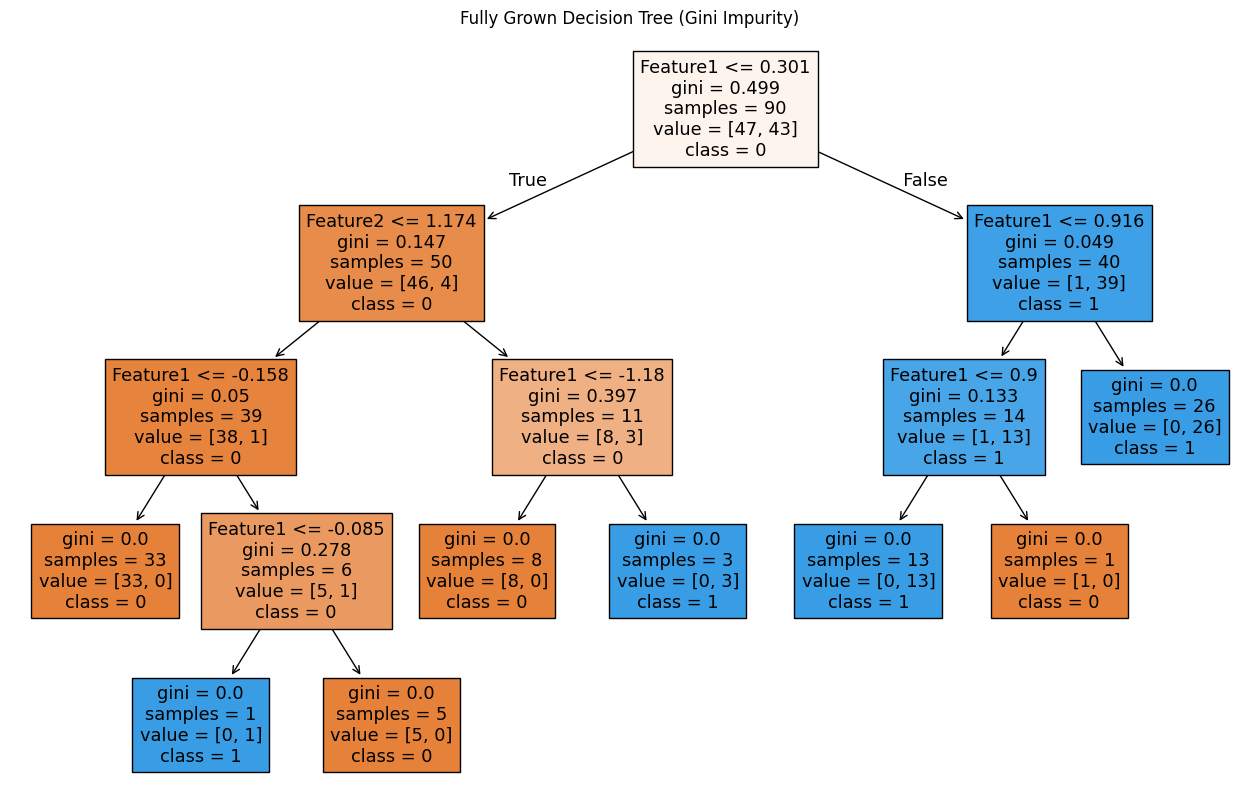

In [26]:
# Visualize the fully grown tree
plt.figure(figsize=(16, 10))
plot_tree(clf_full, feature_names=['Feature1', 'Feature2'], class_names=['0', '1'], filled=True)
plt.title("Fully Grown Decision Tree (Gini Impurity)")
plt.show()

## **(b) Compute SSE at each depth**

In [27]:
def compute_sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

depths = list(range(1, 21))
sse_values = []

for depth in depths:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    sse = compute_sse(y, y_pred)
    sse_values.append(sse)

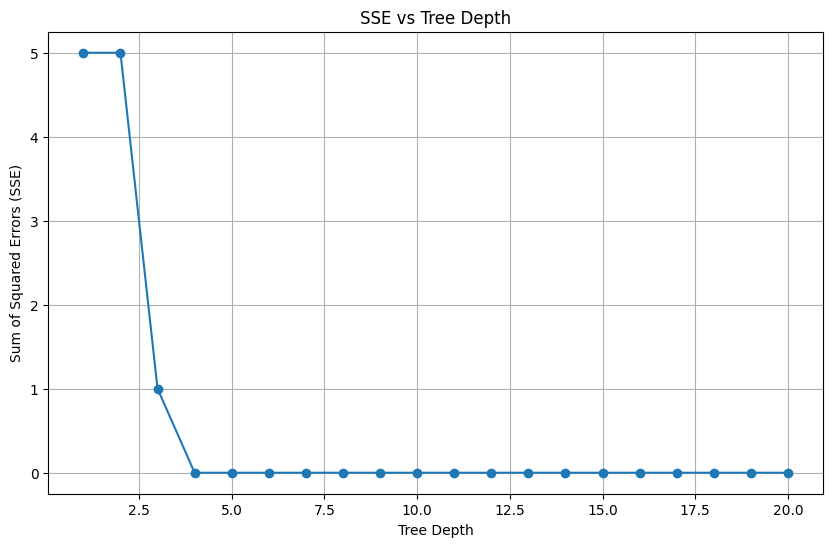

In [28]:
# Plot SSE vs Depth
plt.figure(figsize=(10, 6))
plt.plot(depths, sse_values, marker='o')
plt.title("SSE vs Tree Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid(True)
plt.show()

## **(c) Optimal pruning depth**

In [29]:
# Find depth where SSE first becomes 0 or minimal change
for i in range(1, len(sse_values)):
    if abs(sse_values[i] - sse_values[i-1]) < 1e-6:
        optimal_depth = depths[i]
        break
print(f"Optimal Pruning Depth = {optimal_depth}")

Optimal Pruning Depth = 2


##**(d) Visualize pruned tree**

In [30]:
clf_pruned = DecisionTreeClassifier(criterion='gini', max_depth=optimal_depth, random_state=42)
clf_pruned.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

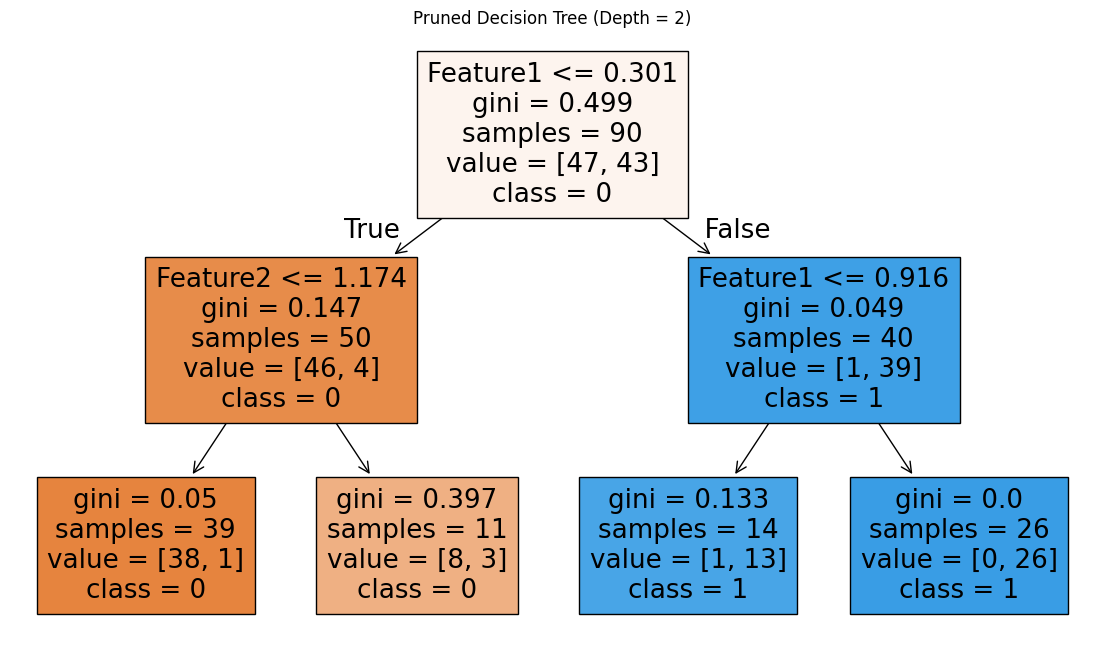

In [31]:
# Plot the pruned tree
plt.figure(figsize=(14, 8))
plot_tree(clf_pruned, feature_names=['Feature1', 'Feature2'], class_names=['0', '1'], filled=True)
plt.title(f"Pruned Decision Tree (Depth = {optimal_depth})")
plt.show()

#**Question 2**

##**Load Data**

In [32]:
df = pd.read_csv("/content/A2_P2_ae609303-e3ee-4dc3-85f0-d40fdde4ae63.csv")

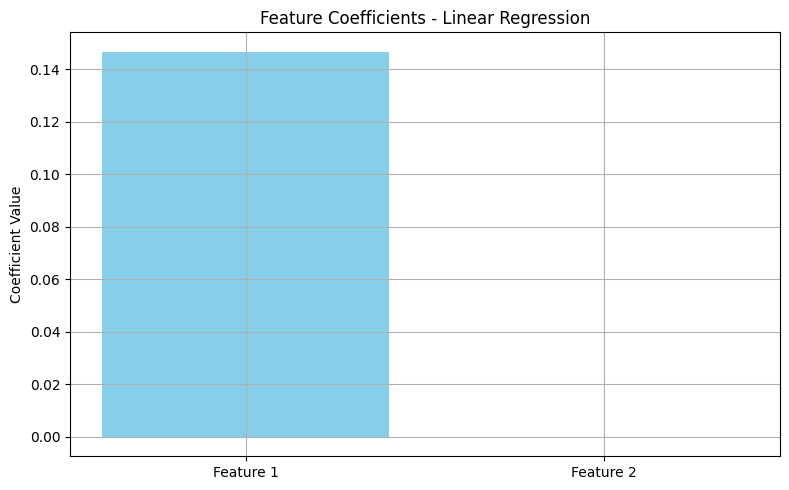

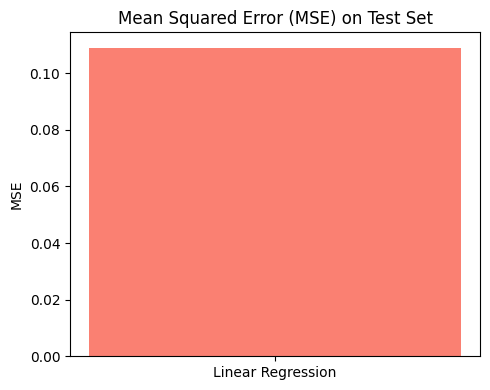

Mean Squared Error: 0.10898865931003421
Feature Coefficients:
Feature 1: 0.1468
Feature 2: -0.0000


In [33]:
# Drop the 'Samples' column if present
df = df.drop(columns=["Samples"], errors='ignore')
# Features and target
X = df[['Feature 1', 'Feature 2']]
y = df['Output']

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# ---- Plot Coefficients ----
plt.figure(figsize=(8, 5))
plt.bar(X.columns, model.coef_, color='skyblue')
plt.title("Feature Coefficients - Linear Regression")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- Plot MSE ----
plt.figure(figsize=(5, 4))
plt.bar(["Linear Regression"], [mse], color='salmon')
plt.title("Mean Squared Error (MSE) on Test Set")
plt.ylabel("MSE")
plt.tight_layout()
plt.show()

# Print details
print("Mean Squared Error:", mse)
print("Feature Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")